In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [5]:
df = pd.read_csv('data/stud.csv')

In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [15]:
unique_var = {}
for column in df.columns:
    if df[column].dtypes == "O":
        a = df[column].unique()
        unique_var[column] = a

for i,j in unique_var.items():
    print(f"{i} :    {j}")

gender :    ['female' 'male']
race_ethnicity :    ['group B' 'group C' 'group A' 'group D' 'group E']
parental_level_of_education :    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch :    ['standard' 'free/reduced']
test_preparation_course :    ['none' 'completed']


In [7]:
X = df.drop('math_score',axis=1)

In [8]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [9]:
y = df['math_score']

In [10]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [11]:
num_features = X.select_dtypes(exclude = 'object').columns
cat_features = X.select_dtypes(include = 'object').columns

In [16]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor  = ColumnTransformer(

    [
        ("OneHotEncoder", oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer, num_features),
    ]
)


In [18]:
X = preprocessor.fit_transform(X)

In [22]:
X.shape

(1000, 19)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [51]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [54]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "K-Neighbours Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoost Regressor": CatBoostRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for k,v in models.items():
    v.fit(X_train, y_train)

    y_train_pred = v.predict(X_train)
    y_test_pred = v.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse,model_test_r2 = evaluate_model( y_test, y_test_pred)

    print(k)
    model_list.append(k)

    print("Model performance for Training set")
    print(f"Root mean Squared Error: {model_train_rmse}")
    print(f"Mean Absolute Error: {model_train_mae}")
    print(f"R2 Score: {model_train_r2}")

    print('-------------------------------------')

    print("Model performance for Test set")
    print(f"Root mean Squared Error: {model_test_rmse}")
    print(f"Mean Absolute Error: {model_test_mae}")
    print(f"R2 Score: {model_test_r2}")
    r2_list.append(model_test_r2)

    print("="*35)
    print('\n')





LinearRegression
Model performance for Training set
Root mean Squared Error: 5.329287354885032
Mean Absolute Error: 4.271484375
R2 Score: 0.874022530822051
-------------------------------------
Model performance for Test set
Root mean Squared Error: 5.425185408698029
Mean Absolute Error: 4.2221875
R2 Score: 0.8790464771743793


Ridge
Model performance for Training set
Root mean Squared Error: 5.323324922741654
Mean Absolute Error: 4.264987823725981
R2 Score: 0.8743042615212909
-------------------------------------
Model performance for Test set
Root mean Squared Error: 5.390387016935637
Mean Absolute Error: 4.21110068801426
R2 Score: 0.8805931485028738


Lasso
Model performance for Training set
Root mean Squared Error: 6.593815587795565
Mean Absolute Error: 5.206302661246526
R2 Score: 0.8071462015863458
-------------------------------------
Model performance for Test set
Root mean Squared Error: 6.519694535667419
Mean Absolute Error: 5.157881810347763
R2 Score: 0.8253197323627853


K-N

In [55]:

pd.DataFrame(list(zip(model_list,r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by= ['R2_Score'], ascending=False)

,Model Name,R2_Score
1,Ridge,0.880593
0,LinearRegression,0.879046
5,Random Forest Regressor,0.852731
7,CatBoost Regressor,0.851632
8,AdaBoostRegressor,0.843332
2,Lasso,0.825320
6,XGBRegressor,0.821589
3,K-Neighbours Regressor,0.783813
4,Decision Tree,0.739581


In [56]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(f"Accuracy of the model: {score}")

Accuracy of the model: 87.90464771743794


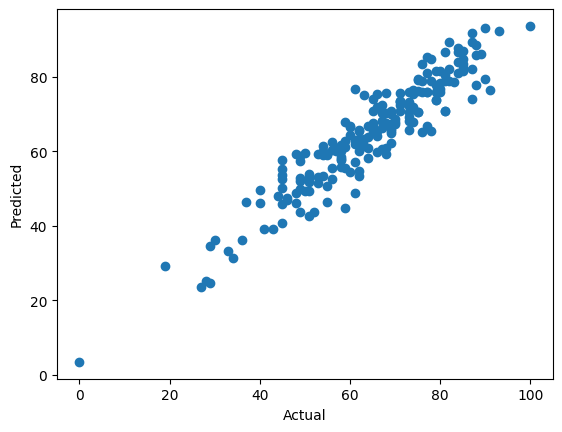

In [57]:
#Plot
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

<Axes: xlabel='math_score'>

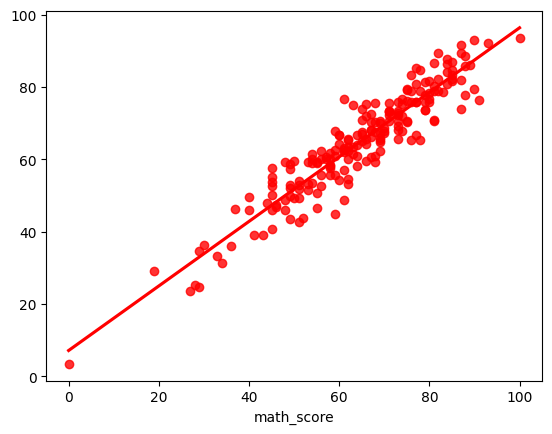

In [58]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')

In [59]:
pred_df = pd.DataFrame({'Actual Value': y_test, "Predicted Value": y_pred, "Difference": y_test - y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.4375,14.5625
737,53,59.3125,-6.3125
740,80,76.6250,3.3750
660,74,76.5625,-2.5625
411,84,87.7500,-3.7500
...,...,...,...
408,52,43.6875,8.3125
332,62,62.3125,-0.3125
208,74,67.7500,6.2500
613,65,67.0000,-2.0000
